## Load Cleaned Datasets

In [1]:
import pandas as pd

def load_cleaned_datasets():
    df_cleaned_togo = pd.read_csv("../data/processed/togo-cleaned.csv")
    df_cleaned_benin =  pd.read_csv("../data/processed/benin-cleaned.csv")
    df_cleaned_sierraleone =  pd.read_csv("../data/processed/sierraleone-cleaned.csv")

    return {
        'df_cleaned_togo': df_cleaned_togo,
        'df_cleaned_benin': df_cleaned_benin,
        'df_cleaned_sierraleone': df_cleaned_sierraleone
    }

In [2]:
dataset = load_cleaned_datasets()

df_cleaned_togo = dataset.get("df_cleaned_togo")
df_cleaned_benin = dataset.get("df_cleaned_benin")
df_cleaned_sierraleone = dataset.get("df_cleaned_sierraleone")


## Metric Comparison

### Box Plot

In [3]:
df_cleaned_togo['Country'] = "Togo"
df_cleaned_benin['Country'] = 'Benin'
df_cleaned_sierraleone['Country'] = 'Sierra Leone'


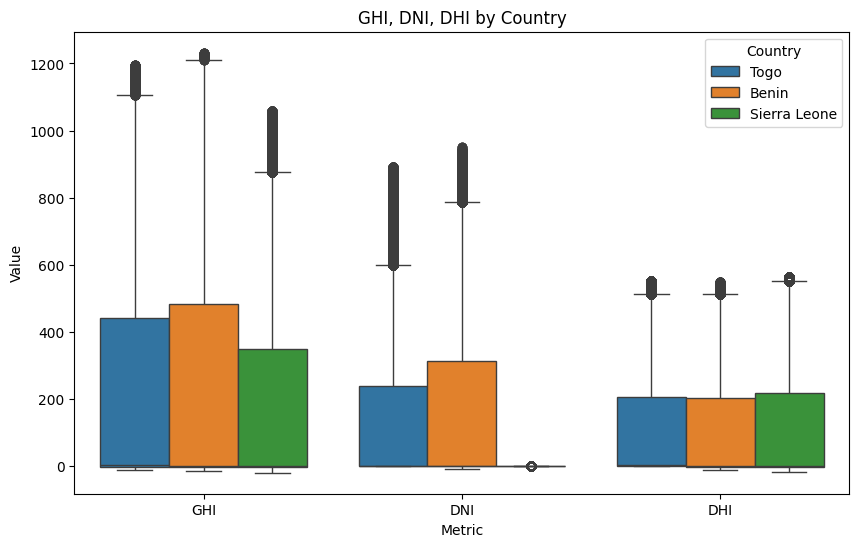

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format
metrics = ['GHI', 'DNI', 'DHI']
# Concatenate all data
df_all = pd.concat([df_cleaned_togo, df_cleaned_benin, df_cleaned_sierraleone], ignore_index=True)
df_long = df_all.melt(id_vars='Country', value_vars=metrics, var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Value', hue='Country', data=df_long)
plt.title('GHI, DNI, DHI by Country')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Country')
plt.show()

### Summary Table

In [5]:
metrics = ['GHI', 'DNI', 'DHI']

summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
display(summary)

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.340468    1.8  330.865639  167.187516   -0.1  261.710501   
Sierra Leone  193.813845    0.3  288.114440   -0.161134   -0.1    0.130094   
Togo          229.793299    2.1  321.599351  148.723310    0.0  247.774379   

                     DHI                     
                    mean median         std  
Country                                      
Benin         106.036426    1.6  147.197681  
Sierra Leone  108.315893   -0.1  152.069104  
Togo          109.151766    2.5  147.495331

## Statistical Testing

#### Check Distribution of GHI and decide the type of test to use

GHI Distribution for Benin


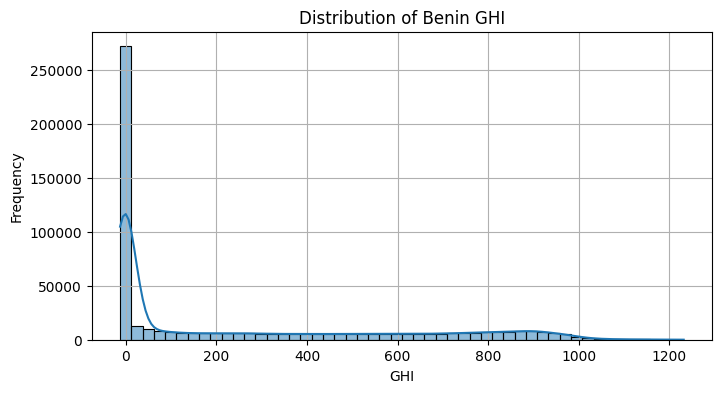

In [7]:
print("GHI Distribution for Benin")
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned_benin['GHI'], kde=True, bins=50)
plt.title(f'Distribution of Benin GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

GHI Distribution for Togo


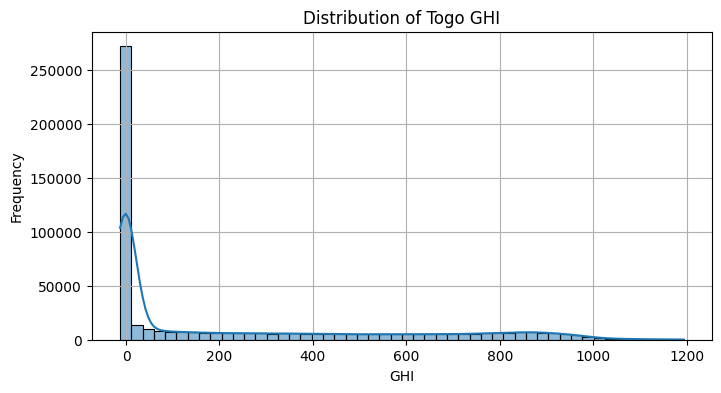

In [8]:
print("GHI Distribution for Togo")
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned_togo['GHI'], kde=True, bins=50)
plt.title(f'Distribution of Togo GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

GHI Distribution for Sierraleone


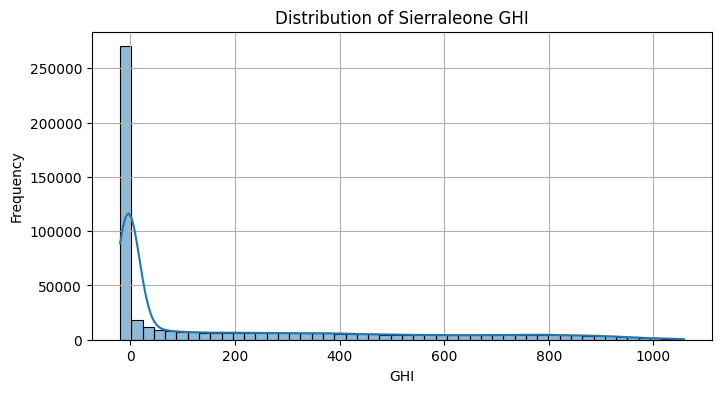

In [9]:
print("GHI Distribution for Sierraleone")
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned_sierraleone['GHI'], kde=True, bins=50)
plt.title(f'Distribution of Sierraleone GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

GHI Data is highly skewed in all three countries, hence Kruskal–Wallis test will be used.

### Kruskal–Wallis test

In [11]:
from scipy.stats import kruskal

# Extract GHI values for each country
ghi_togo = df_cleaned_togo['GHI'].dropna()
ghi_benin = df_cleaned_benin['GHI'].dropna()
ghi_sierraleone = df_cleaned_sierraleone['GHI'].dropna()

In [12]:
# Kruskal–Wallis test (non-parametric)
kruskal_stat, kruskal_p = kruskal(ghi_togo, ghi_benin, ghi_sierraleone)
print(f"Kruskal–Wallis p-value: {kruskal_p:.4f}")

Kruskal–Wallis p-value: 0.0000


In [13]:

if kruskal_p < 0.05:
    print("Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).")
else:
    print("Kruskal–Wallis: No significant differences in GHI between countries (p >= 0.05).")

Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).


## Three key points

- **Togo exhibits the highest median GHI among the three countries, indicating greater solar resource potential. The median is selected over the mean as it is more robust to outliers**
- **Sierra Leone shows the greatest variability in GHI, DNI, and DHI, suggesting more fluctuation in solar irradiance.**
- **Statistical testing (Kruskal–Wallis) confirms significant differences in GHI distributions between countries (p < 0.05), indicating their solar resource potentials are not equal**

## Ranking Countries by average GHI

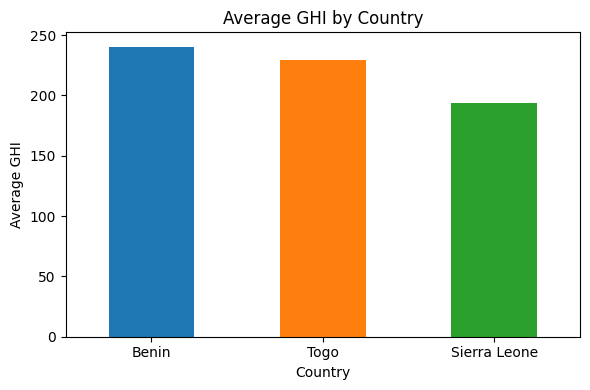

In [14]:
import matplotlib.pyplot as plt

# Calculate mean GHI for each country
mean_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
mean_ghi.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()